In [1]:
from hiresprv.auth import login
from hiresprv.archive import Archive
from hiresprv.database import Database
import pandas as pd
from hiresprv.idldriver import Idldriver
from hiresprv.download import Download
import numpy as np
from astropy.io import fits
from astropy.table import Table
from astropy.wcs import WCS
import matplotlib.pyplot as plt
from specutils import Spectrum1D,spectrum_collection
import pylab as pl #For ploting echelle spectra 
import os 

In [2]:
login('prv.cookies')

koa = Archive('prv.cookies')

idl = Idldriver('prv.cookies')

state = Database('prv.cookies')

KOA userid: jgussman
KOA Password: ········
Successful login as jgussman


                                       Downloading 

In [41]:
crossMatchedNames = pd.read_csv("../spocData/starnames_crossmatch_SPOCS_NEXSCI.txt",sep=" ",header=None)
HIRESstarNamesList = []
for starNames in crossMatchedNames.to_numpy():
    HIRESstarNamesList.append(starNames[1])
    
    star_info = state.target_info(starNames[1])
    df = pd.read_html(star_info, header=0)[0]
    print(df.loc[df["FILENAME"] == "r20040823.215"])

    #print("r20040823.215" in df["FILENAME"].to_numpy())
    #print(df)
    break
    
    #"r20050820.156"


       DATE  DEACTIVATED    OBTYPE       FILENAME    TARGET        MJD  \
2  20040823            0  Template  r20040823.215  HD11964A  2400000.5   

            BJD      BCVEL  RADVEL  RA  DEC  EPOCH  HRANG  RA_MOTION  \
2  2.452998e+06 -26856.678     0.0 NaN  NaN    0.0  6.779        0.0   

   DEC_MOTION  PARALLAX  ORIGFILENAME  KOAID  
2         0.0       0.0           NaN    NaN  


In [29]:
for filename in df["FILENAME"].to_numpy():
    for deblazedfilename in deblazedSpectraList:
        if filename in deblazedfilename:
            print(filename, deblazedfilename)

r20040821.211 deblazed/r20040821.211.fits
r20040823.207 deblazed/r20040823.207.fits
r20040823.215 deblazed/r20040823.215.fits
r20040823.216 deblazed/r20040823.216.fits
r20040823.217 deblazed/r20040823.217.fits
r20040823.229 deblazed/r20040823.229.fits
r20041023.154 deblazed/r20041023.154.fits
r20041024.173 deblazed/r20041024.173.fits
r20041025.156 deblazed/r20041025.156.fits
r20041025.157 deblazed/r20041025.157.fits
r20041025.158 deblazed/r20041025.158.fits
r20041025.168 deblazed/r20041025.168.fits
r20041129.165 deblazed/r20041129.165.fits
r20041130.166 deblazed/r20041130.166.fits
r20041229.104 deblazed/r20041229.104.fits
r20041229.209 deblazed/r20041229.209.fits
r20041230.142 deblazed/r20041230.142.fits
r20041230.143 deblazed/r20041230.143.fits
r20050127.119 deblazed/r20050127.119.fits
r20050128.165 deblazed/r20050128.165.fits
r20050129.114 deblazed/r20050129.114.fits
r20050130.116 deblazed/r20050130.116.fits
r20050224.124 deblazed/r20050224.124.fits
r20050225.108 deblazed/r20050225.1

In [3]:
data = Download('prv.cookies', './')                     #Opens up my workspace 
#The deblazed spectra were already in my workspace from previously getting the spectra.
#In the future I should redo this so it will put all these deblazed spectra in my workspace. 
dataDirectoryListing = data.directory_listing()          #Shows everything that can be downloaded 
deblazedSpectraList = dataDirectoryListing['deblazed']   #Gets me all the deblazed spectra

In [4]:
dataDirectoryListing

{'dnloadlog': ['dnloadlog/20180902.json', 'dnloadlog/20070713.json'],
 'logsheets': ['logsheets/20071229.logsheet1',
  'logsheets/20080624.logsheet1',
  'logsheets/20110319.logsheet1',
  'logsheets/20160202.logsheet1',
  'logsheets/20110904.logsheet1',
  'logsheets/20120213.logsheet1',
  'logsheets/20180723.logsheet1',
  'logsheets/20070530.logsheet1',
  'logsheets/20171210.logsheet1',
  'logsheets/20160921.logsheet1',
  'logsheets/20100701.logsheet1',
  'logsheets/20110517.logsheet1',
  'logsheets/20140710.logsheet1',
  'logsheets/20101126.logsheet1',
  'logsheets/20100801.logsheet1',
  'logsheets/20100829.logsheet1',
  'logsheets/20100504.logsheet1',
  'logsheets/20150803.logsheet1',
  'logsheets/20090809.logsheet1',
  'logsheets/20060213.logsheet1',
  'logsheets/20100729.logsheet1',
  'logsheets/20120305.logsheet1',
  'logsheets/20110812.logsheet1',
  'logsheets/20150703.logsheet1',
  'logsheets/20090709.logsheet1',
  'logsheets/20120726.logsheet1',
  'logsheets/20140906.logsheet1',

In [ ]:
#Downloading all the deblazed spectra
for filepath in deblazedSpectraList:
    data.download(filepath)

                                         Plotting 

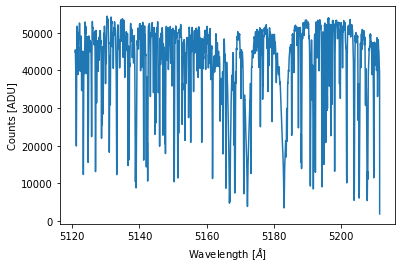

In [43]:
spectrum = fits.getdata("r20040823.215.fits")
wavelength = fits.getdata('http://caltech-ipac.github.io/hiresprv/_static/keck_rwav.fits')

#5.39e14 is ADU to ergs from http://www.astrosurf.com/buil/calibration2/absolute_calibration_en.htm 
pl.plot(wavelength[2,:], spectrum[2,:] )
pl.xlabel('Wavelength [$\AA$]')
pl.ylabel('Counts [ADU]')
pl.show()

In [53]:
wv = []
for shell in wavelength:
    for wav in shell:
        wv.append(wav)
flux = []
fixtheflux = 50_000                    #I need to figure out what this # should be before I proceed 
for shell in spectrum:
    for count in shell:
        flux.append(count/fixtheflux)        

In [45]:
#Downloading Solar Spectra
wvnum, wvlen, crf, tel, c, n = np.genfromtxt("../Atlases/solarAtlas.txt",skip_header=1,unpack=True)
wvnum, wvlen, crf, tel, c, n = wvnum[::-1], wvlen[::-1], crf[::-1], tel[::-1], c[::-1], n[::-1] 

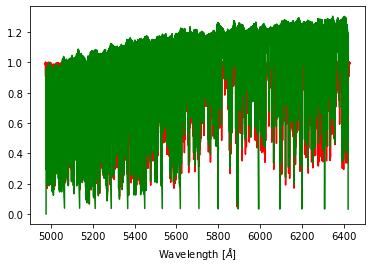

In [54]:
#Plotting ONE deblazed spectra against the solar before I fit the deblazed spectra to a continuum
start = 240000
stop = int(len(wvlen)/1.85)
pl.plot(wvlen[start:stop],c[start:stop],'r')
pl.plot(wv, flux,'g')
pl.xlabel('Wavelength [$\AA$]')
pl.show()

                                      Continuum Fitting

In [ ]:
#Going to be using https://specutils.readthedocs.io/en/stable/fitting.html as reference
